Run the cell below to import the required packages for this notebook:

In [53]:
# the plotting package is matplotlib:
import matplotlib.pyplot as plt 
# the next line allows you to view the plots more easily:
%matplotlib inline
# the numpy package has import math stuff in it:
import numpy as np 
# the pandas package allows us to do spreadsheet stuff:
import pandas as pd

Recall Euler's method to approximate the solution to $\frac{dy}{dx} = f(x,y)$. We'll write a program called euler that takes in a function $f(x,y)$, an initial x value $x_0$, an initial y value $y_0$, a step size $h$, and an end x value $x_1$ and returns the end y-value approximation. We'll simultaneously update the x and y values:

In [54]:
def euler(f,x0,y0,h,x1):
    steps = int((x1-x0)/h)
    for i in range(steps):
        x0, y0 = x0 + h, y0+h*f(x0)
        print(x0, y0)
    return y0

print(euler(np.sin, 0, 1, 0.5, 2))

0.5 1.0
1.0 1.2397127693021015
1.5 1.6604482617060499
2.0 2.159195755008077
2.159195755008077


Notice that up until now, we've been only printing values, not storing them for later use. If we want to plot the Euler's method solution, for example, we'll definitely want to store all of the Euler's method (x,y) coordinates in a list. Therefore, let's learn about lists next.

### Lists
Lists start at index 0 (not 1). 

We can reference the length of the list using "len".

Here's a list of dogs:

In [55]:
dogs = ['border collie', 'australian cattle dog', 'labrador retriever']
print(dogs)
print(dogs[0])
print(dogs[1])
print(dogs[2])
print(len(dogs))

['border collie', 'australian cattle dog', 'labrador retriever']
border collie
australian cattle dog
labrador retriever
3


We can create empty lists using square brackets.

We can add things to lists by using .append:

In [56]:
dogs = []
dogs.append('pit bull')
dogs.append('boxer')
dogs.append('labrador')
print(dogs)

['pit bull', 'boxer', 'labrador']


We can loop through lists using for loops:

In [57]:
dogs = ['border collie', 'australian cattle dog', 'labrador retriever']
for doggie in dogs:
    print(doggie)

border collie
australian cattle dog
labrador retriever


Be careful, though, because looping through lists is one of the trickiest things to get started with. What if I had printed "dogs" instead of "doggie" inside the for loop? It would just print the entire dogs list three times:

In [58]:
dogs = ['border collie', 'australian cattle dog', 'labrador retriever']
for doggie in dogs:
    print(dogs)

['border collie', 'australian cattle dog', 'labrador retriever']
['border collie', 'australian cattle dog', 'labrador retriever']
['border collie', 'australian cattle dog', 'labrador retriever']


Notice that "for doggie in dogs" simply creates a loop that executes three times, and you can specify whatever you want inside that loop by indenting the commands:

In [59]:
dogs = ['border collie', 'australian cattle dog', 'labrador retriever']

print("I'm about to enter the doggie loop.")

count = 1
for doggie in dogs:
    print("Hi! This is time", count, "through the doggie loop.")
    count = count + 1
    
print("Now I'm out of the doggie loop.")

I'm about to enter the doggie loop.
Hi! This is time 1 through the doggie loop.
Hi! This is time 2 through the doggie loop.
Hi! This is time 3 through the doggie loop.
Now I'm out of the doggie loop.


Here's an example where I sum all of the expenses in my list:

In [60]:
def sum_expenses(expenses):
    counter = 0
    for expense in expenses:
        counter = counter + expense
    return counter

expenses = [20, 100, -50, 0, 80]

sum_expenses(expenses)

150

We can even add conditional statements in to print a message about the user's balance:

In [61]:
def sum_expenses(expenses):
    counter = 0
    for expense in expenses:
        counter = counter + expense
    if counter > 0:
        print("Your balance is positive!")
    elif counter == 0:
        print("You have no money left!")
    else:
        print("You owe money!")
    return counter

expenses = [20, 100, -50, 0, 80]

sum_expenses(expenses)

Your balance is positive!


150

We can iterate through lists in two ways. 

Firstly, we can say something like "for item in item_list" like we did earlier:

In [62]:
doggies = ['border collie', 'australian cattle dog', 'labrador retriever', 'pitbull']
for dog in doggies:
    print(dog)

border collie
australian cattle dog
labrador retriever
pitbull


Alternatively, we can use the range function to iterate through the list by using its index value:

In [63]:
dogs = ['border collie', 'australian cattle dog', 'labrador retriever', 'pit bull']
for i in range(len(dogs)):
    print(dogs[i])

border collie
australian cattle dog
labrador retriever
pit bull


Even though the second method looks uglier, it is sometimes helpful since it gives us more control over what items in the list we choose to iterate through (only the even indexed items, for example):

In [64]:
dogs = ['border collie', 'australian cattle dog', 'labrador retriever', 'pit bull']
for i in range(0,len(dogs),2):
    print(dogs[i])

border collie
labrador retriever


We often want to add things to a list within a for loop. To add all of the integers between 0 and 10, we can type:

In [65]:
integers = []
for i in range(11):
    integers.append(i)
print(integers)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


What if we wanted to add all of the factors of 20 to a list?

In [66]:
factors = []
for i in range(1,21):
    if 20 % i == 0:
        factors.append(i)
print(factors)

[1, 2, 4, 5, 10, 20]


Going back to Euler's method, we can create two lists, one for the x and one for the y coordinates.

In [67]:
def euler(f,x0,y0,h,x1):
    x = np.arange(x0,x1+h,h) #generates list of x coordinates between x0 and x1 using step size h
    y = [y0]
    for i in range(1,len(x)):
        y0 = y0+h*f(x[i-1])
        y.append(y0)
        print(x[i], y[i])

euler(np.sin, 0, 1, 0.5, 2)

0.5 1.0
1.0 1.2397127693021015
1.5 1.6604482617060499
2.0 2.159195755008077


We can then plot the coordinates:

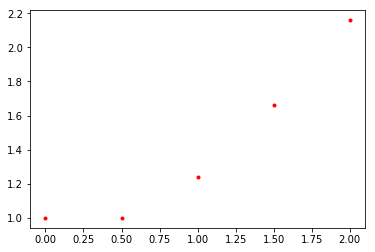

In [68]:
def euler(f,x0,y0,h,x1):
    x = np.arange(x0,x1+h,h) 
    y = [y0]
    for i in range(1,len(x)):
        y0 = y0+h*f(x[i-1])
        y.append(y0)
    plt.plot(x,y,'r.')

euler(np.sin, 0, 1, 0.5, 2)

How does the Euler's method approximation compare to the true solution $y=2-\cos(x)$?

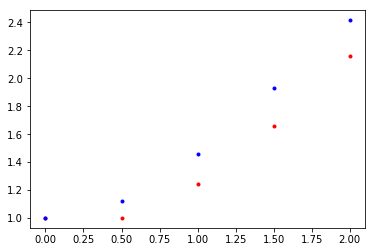

In [69]:
def euler(f,x0,y0,h,x1):
    x = np.arange(x0,x1+h,h) 
    y = [y0]
    for i in range(1,len(x)):
        y0 = y0+h*f(x[i-1])
        y.append(y0)
    plt.plot(x,y,'r.')
    plt.plot(x,2-np.cos(x),'b.')

euler(np.sin, 0, 1, 0.5, 2)

As one last example, suppose I want to create the Fibonacci sequence by referencing the last two items in my list and adding them. The indices "-1" and "-2" reference the last two items in the list:

In [70]:
def fibonacci(n):
    sequence = [1,1]
    for i in range(2,n):
        sequence.append(sequence[-1]+sequence[-2])
    return sequence

fibonacci(7)

[1, 1, 2, 3, 5, 8, 13]

### In-class Exercise: Great Lakes Pollution or SIRS Infectious Disease
Look at Great Lakes Problem (precal) or the SIRS infectious disease problem (calc). Use iteration and plotting to view the solution. First, do the iteration in a spreadsheet and THEN do it in Python.

### Great Lakes Solution

Here is one way to do the problem:

0 3500 1800 2400
0 3140.0 1537.0 2760.0
0 2819.6 1329.08 2982.12
0 2534.444 1160.7672 3102.7344
0 2280.65516 1021.679848 3148.282464
0 2054.7830924 904.74717032 3138.2933135999997
0 1853.756952236 805.0643291688 3087.4070972831996
0 1674.8436874900399 719.154435413992 3006.7414041099837
0 1515.6108818661355 644.4916442888593 2904.8280323658228
0 1373.8936848608605 579.1918493501448 2788.265660425913


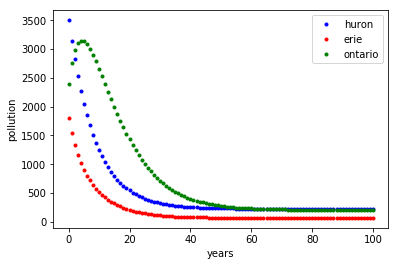

In [71]:
huron = [3500]
erie = [1800]
ontario = [2400]
years = [0]
for i in range(100):
    huron.append(25-0.11*huron[i]+huron[i])
    erie.append(0.11*huron[i]-0.36*erie[i]+erie[i])
    ontario.append(0.36*erie[i]-0.12*ontario[i]+ontario[i])
    years.append(years[i]+1)
    
for i in range(10):
    print(years[0],huron[i], erie[i], ontario[i])
    
plt.plot(years, huron, 'b.', label = 'huron')
plt.plot(years, erie, 'r.', label = 'erie')
plt.plot(years, ontario, 'g.', label = 'ontario')
plt.xlabel('years')
plt.ylabel('pollution')
plt.legend(loc='upper right')

Here is another way to do the problem:

0 3500 1800 2400
0 3140.0 1537.0 2760.0
0 2819.6 1329.08 2982.12
0 2534.444 1160.7672 3102.7344
0 2280.65516 1021.679848 3148.282464
0 2054.7830924 904.74717032 3138.2933135999997
0 1853.756952236 805.0643291688 3087.4070972831996
0 1674.8436874900399 719.154435413992 3006.7414041099837
0 1515.6108818661355 644.4916442888593 2904.8280323658228
0 1373.8936848608605 579.1918493501448 2788.265660425913


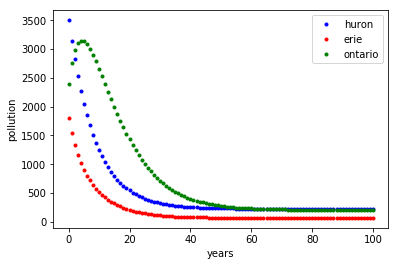

In [72]:
huron = [3500]
erie = [1800]
ontario = [2400]
years = [0]
for i in range(100):
    huron.append(25-0.11*huron[-1]+huron[-1])
    erie.append(0.11*huron[-2]-0.36*erie[-1]+erie[-1])
    ontario.append(0.36*erie[-2]-0.12*ontario[-1]+ontario[-1])
    years.append(years[-1]+1)
    
for i in range(10):
    print(years[0],huron[i], erie[i], ontario[i])
    
plt.plot(years, huron, 'b.', label = 'huron')
plt.plot(years, erie, 'r.', label = 'erie')
plt.plot(years, ontario, 'g.', label = 'ontario')
plt.xlabel('years')
plt.ylabel('pollution')
plt.legend(loc='upper right')

### SIRS Solution:

In [ ]:
sus = [0.9]
inf = [0.1]
rem = [0.0]
days = [0]

#create your ds/dt and di/dt functions
def ds_dt(s,i):
    return -0.6*s*i+0.1*(1-s-i)

def di_dt(s,i):
    return 0.6*s*i-.34*i

#Euler's method
for i in range(100):
    sus.append(sus[i]+1*ds_dt(sus[i], inf[i]))
    inf.append(inf[i]+1*di_dt(sus[i], inf[i]))
    rem.append(1-sus[i]-inf[i])
    days.append(days[i]+1)

for i in range(10):
    print(days[i],sus[i], inf[i], rem[i])
    
plt.plot(days, inf, 'b.', label = 'inf')
plt.plot(days, sus, 'r.', label = 'sus')
plt.plot(days, rem, 'g.', label = 'rem')
plt.xlabel('days')
plt.ylabel('percent')
plt.legend(loc='upper right')

To do a subplot of the time plot and the phase plane, you can type the following. More subplot examples are located here:

https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10] #makes figure bigger
fig, (ax1, ax2) = plt.subplots(2) #creates two vertical subplots

fig.suptitle('Infectious Disease Modeling') #puts title above both of them

ax1.plot(days, inf, 'b.', label = 'inf')
ax1.plot(days, sus, 'r.', label = 'sus')
ax1.plot(days, rem, 'g.', label = 'rem')

ax1.set_xlabel('days')
ax1.set_ylabel('percent')
ax1.set_title('Time plot')
ax1.legend(loc='upper right')

ax2.plot(sus, inf, '.')
ax2.set_title('Phase Plane')
ax2.set_xlabel('susceptible')
ax2.set_ylabel('infected')

### In-class or for homework bonus exercise: China Population - A Leslie Model
Open the "china shorter handout." Model the population of China. You can do this using the same iteration techniques as above OR if you know a little bit of linear algebra you can use it. Multiplying the Leslie Matrix a certain number of times by the initial population vector will give you the population later in time. In addition, calculating the largest real eigenvalue will give you the growth or decay rate. See "Day 2 Notes" for more linear algebra Python tips.

### China Solution
For the China example, our Leslie Matrix and our initial population vector are:

In [ ]:
L = np.matrix([[0,.28,.22,0,0,0,0,0,0], 
               [.97,0,0,0,0,0,0,0,0],
              [0,.993,0,0,0,0,0,0,0],
              [0,0,.987,0,0,0,0,0,0],
              [0,0,0,.981,0,0,0,0,0],
              [0,0,0,0,.962,0,0,0,0],
              [0,0,0,0,0,.907,0,0,0],
              [0,0,0,0,0,0,.761,0,0],
              [0,0,0,0,0,0,0,.51,0]])
P = np.matrix([[102],[129],[85],[64],[49],[37],[24],[11],[3]])

So one iteration (10 years later) in 1992, the population distributions are:

In [ ]:
print(L*P)

10 iterations (100 years) later in 2082:

In [ ]:
print(L**10*P)

The growth rate is the largest eigenvalue. Thus, the largest eigenvaule of 0.75 corresponds to the fact that the population is decreasing at a rate of 25% every 10 years in the long run.

In [ ]:
from scipy import linalg
eigenvalues, eigenvectors = linalg.eig(L)
print(eigenvalues)

### Introduction to Simulations

### Random Numbers

To generate a random number between 0 and 1, we can use the random package:

In [ ]:
import random

print(random.random())

To generate five random numbers, we could create a loop:

In [ ]:
for i in range(5):
    print(random.random())

To simulate five rolls of a die between 1 and 6, inclusive, type:

In [ ]:
for i in range(5):
    print(random.randint(1,6))

We can also use the random function to pick random elements from a list. For example, to pick a random student's name from a group of 5 students, we could type:

In [ ]:
students = ['Jack', 'Abby', 'Mary', 'Peter', "Stella"]
print(random.choice(students))


If I wanted to generate two random names from the list, I could use the sample method, which samples without replacement:

In [ ]:
students = ['Jack', 'Abby', 'Mary', 'Peter', "Stella"]
print(random.sample(students,2))

Suppose you want to simulate rolling a die and add each die roll to a list. Yes, you can create a list of numbers 1,2,3,4,5, and 6, but if you do rand(sample, 3), then you'll never get the same number twice, which doesn't make sense, since the rolls of the dice are independent of each other. To randomly generate ten rolls and add them to a list, where some numbers may be the same, type:

In [ ]:
rolls = []
for i in range(10):
    rolls.append(random.randint(1,6))
print(rolls)

What if it wasn't a fair die? What if the probability of getting each number was given by:

|  Die Face |Probability   |
|---   |---   |
|1 |0.05  | 
|2 | 0.05 |
|3 |0.50  |
|4 | 0.10 |
|5 |0.20  |
|6 | 0.10 |

Then we would select numbers between 0 and 99 based on the above probabilities. For example, since there is a 5% chance that we will roll a 1, we'll assign the numbers 0,1,2,3, and 4 to the die roll 1. Here are fifty rolls:

In [ ]:
rolls = []
for i in range(50):
    roll = random.randint(0,99)
    if 0 <= roll < 5:
        rolls.append(1)
    if 5 <= roll < 10:
        rolls.append(2)
    if 10 <= roll < 60:
        rolls.append(3)
    if 60 <= roll < 70:
        rolls.append(4)
    if 70 <= roll < 90:
        rolls.append(5)
    if 90 <= roll < 100:
        rolls.append(6)
print(rolls)

What was our average die roll?

In [ ]:
print(sum(rolls)/len(rolls))

As another example, suppose that you have an unfair coin that has a 60% probability of coming up heads and you toss it ten times. On average, what percentage of the time will you get at least 8 heads?

First, we can create one list of 10 tosses.

In [ ]:
tosses = []
for i in range(10):
    toss = random.randint(0,9)
    if 0 <= toss < 6:
        tosses.append('H')
    else:
        tosses.append('T')
print(tosses)

We can calculate the percentage of heads that show up:

In [ ]:
print(tosses.count('H')/len(tosses))

Now, we can run this simulation 10,000 times, and each time, save the percentage of heads that we see. The first 10 percentages that we see are:

In [ ]:
percent_heads = []
for i in range(10000):
    tosses = []
    for i in range(10):
        toss = random.randint(0,9)
        if 0 <= toss < 6:
            tosses.append('H')
        else:
            tosses.append('T')
    percent = tosses.count('H')/len(tosses)
    percent_heads.append(percent)

print(percent_heads[0:10])

Lastly, to figure out what percentage of the time we got 8 or more heads, we'll count the number of times we got 8, 9, or 10 heads, and then divide by the number of simulations:

In [ ]:
print((percent_heads.count(0.8) + percent_heads.count(0.9) + percent_heads.count(1.0))/len(percent_heads))

### Exercise 1 - Euler's plot
Returning to your earlier Euler's method exercise for $f(x)=x^2$ given $f(1)=2$ and a step size of $0.25$, now plot the Euler's method approximation coordinates versus the true solution, $f(x)=\frac{x^3}{3}+\frac{5}{3}$, by storing the x and y coordinates in two lists.

In [ ]:
#insert exercise 1
def square(x):
    return x**2

def cube(x):
    return (x**3+5)/3

def euler(f,x0,y0,h,x1):
    x = np.arange(x0,x1+h,h)
    y = [y0]
    for i in range(1,len(x)):
        y0 = y0+h*f(x[i-1])
        y.append(y0)
    plt.plot(x,y, 'r.')
    plt.plot(x, cube(x),'b.')

euler(square, 1, 2, 0.5, 5)

### Exercise 2 - Left hand sum
Write a program called LHS that takes in a function, a left boundary a, a right boundary b, and the number of rectangles, n, and returns the left hand sum approximation for the area under $f(x)$ between $x=a$ and $x=b$: 

$\int_a^b f(x)dx \approx \sum_{i=1}^nf(x_{i-1})\Delta x$. 

For example, LHS(square,1,5,8) should return 35.5.

In [ ]:
#insert exercise 2
def square(x):
    return x**2

def LHS(f,a,b,n):
    h = (b-a)/n
    left = 0
    for i in range(n):
        left = left + h*f(a+i*h)
    return left

LHS(square,1,5,8)

### Exercise 3 - Factorial

Iterate through the list ```items=[5,4,3,2,1]``` in two different ways: firstly, by referencing "for item in items" and secondly, by referencing "for i in range(len(items))". Then using whichever way you prefer, multiply the terms in the list to calculate 5! = 120.

In [ ]:
#insert exercise 3
items = [5,4,3,2,1]

product = 1

for item in items:
    product = product * item
print(product)


product = 1

for i in range(len(items)):
    product = product * items[i]
print(product)

### Exercise 4 - Multiples of m
Create a function called multiples_of_m that takes in an integer n and an integer m and returns a list of all of the multiples of m between 0 and n.

In [ ]:
#insert exercise 4
def multiples_of_m(m, n):
    multiples = []
    for i in range(n+1):
        if i % m == 0:
            multiples.append(i)
            
    return multiples

multiples_of_m(3, 21)

### Exercise 5 - Discrimination Example
In a company, there are 20 men and 10 women. Layoffs come and there are 5 men and 5 women that get laid off. Is this evidence of discrimination against women? Simulate how often women get laid off in higher percentages than men, given the makeup of the company.

In [74]:
#insert exercise 5

#first, make the company:

company = []
for i in range(30):
    if i < 10:
        company.append('W')
    else:
        company.append('M')
print(company)
#Let's run the simulation 10000 times and figure out what percentage of women were laid off each time:
percent_women_laid_off = []

nsims = 10000

for i in range(nsims):
    lay_offs = random.sample(company,10) #lay off 10 WITHOUT replacment
    women_laid_off = lay_offs.count('W') #how many of those 10 were women?
    percent_women_laid_off.append(women_laid_off/10) #what percentage of those 5 were women?10

#What percentage of simulations resulted in women getting laid off at a percentage of 0.5 or higher?
print((percent_women_laid_off.count(0.5)
    +percent_women_laid_off.count(0.6)
    +percent_women_laid_off.count(0.7)
    +percent_women_laid_off.count(0.8)
    +percent_women_laid_off.count(0.9)
    +percent_women_laid_off.count(1.0))/nsims)

['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M']
0.1726


### Exercise 6 - Cereal Box Simulation
20% of the cereal boxes contained a picture of Tiger Woods, 30% Lance Armstrong,
and the rest Serena Williams. How many boxes on average do you expect to have to buy before you get a complete set?

Hint: A while loop may be useful for this exercise. Here's are two while loop examples:

In [ ]:
i = 5
while i < 10:
    print(i)
    i = i + 1

In [ ]:
multiple_of_7 = False
i = 2

print("I'm about to start the loop!")
while multiple_of_7 == False:
    print(i)
    if i % 7 == 0:
        multiple_of_7 = True
    i = i + 1

print("I'm done with my loop.")

Here is one solution:

In [ ]:
#insert cereal box answer
#one solution:
import random
boxes = ['Tiger', 'Tiger', 'Lance', 'Lance', 'Lance', 'Serena', 'Serena', 'Serena', 'Serena', 'Serena']
boxes_count = []
sims = 10000

for i in range(sims): #for each simulation
    count = 0 #i haven't bought any cereal boxes yet
    Serena = False #i dont have a serena card yet
    Tiger = False #i dont have a tiger card yet
    Lance = False #i dont have a lance card yet
    while Serena == False or Tiger == False or Lance == False: #until i have a card from all of the athletes
        count = count + 1 #go to the store again
        box = random.choice(boxes) #choose another cereal box
        if box == 'Serena': #check what card I get
            Serena = True
        if box == 'Tiger':
            Tiger = True
        if box == 'Lance':
            Lance = True
    boxes_count.append(count) #after i've gotten all three cards, save how many times i had to go to the store

print(sum(boxes_count)/sims) #find the average number of times that i had to go to the store


Here is another solution:

In [ ]:
#OR another solution:
boxes_list = []
for n in range(10000):
    i = 0
    tiger, lance, serena = 0,0,0
    
    while tiger == 0 or lance == 0 or serena == 0:
        pic = random.randint(0,9)
        if pic <=1:
            tiger = tiger + 1
        elif 2 <= pic <= 4:
            lance = lance + 1
        else:
            serena = serena + 1
        i = i + 1
    boxes_list.append(i)

print(np.mean(boxes_list))

### Super Challenge - Monkeys & Coconuts

Five sailors are shipwrecked on a desert island. They quickly determine that the only other inhabitant of the island is a monkey and that the only food is coconuts. They set about collecting as many coconuts as they can and put them all in a very large pile. By nightfall they are too tired to divide the harvest; so they agree to go to sleep and share the coconuts equally the next morning.

During the night one sailor awakens, suspicious that the others might try to cheat him, and decides to take his portion then and there and not wait until morning. He divides the coconuts into five piles and finds there is one coconut left over, which he gives to the monkey. He hides one of the five piles, then puts the rest of the coconuts back into a pile and returns to sleep. Later a second sailor awakens with the same suspicions and does the same thing: He divides the coconuts into five piles, leaving one extra, which he gives to the monkey. Then he hides what he thinks is his share, puts the remaining coconuts into a pile and goes back to sleep.

One after the other, the rest of the sailors do the same: They each take one fifth of the coconuts in the pile (there is always an extra one, which is given to the monkey) and then return to sleep. When the sailors awaken the next morning they all notice the coconut pile is much smaller than it was the night before, but since each man is as guilty as the others, no one says anything. They divide the coconuts (for the sixth time) and again there is one left for the monkey.

What is the smallest number of coconuts that were in the original pile? Answer this using simulation.


In [42]:
#insert challenge

#Mahmoud just gave me this problem...ask him why the answer is 3121 coconuts!